## 부분회귀

In [70]:
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

In [71]:
dfX_no_AGE = dfX[['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(dfX_no_AGE, dfy, test_size=0.2)

In [73]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mean_squared_error(y_test, pred)

26.14670027457942

In [74]:
for i in zip(dfX_no_AGE.columns, lr.coef_[0]):
    print(i)

('const', 0.0)
('CRIM', -0.09863370294951633)
('ZN', 0.039308755748980156)
('INDUS', 0.05920517505867852)
('CHAS', 2.0026418594489175)
('NOX', -21.033039131904157)
('RM', 3.4525072509394503)
('DIS', -1.4662484639263105)
('RAD', 0.2733377367130192)
('TAX', -0.010259931221863633)
('PTRATIO', -0.9196731291234277)
('B', 0.009145765853174712)
('LSTAT', -0.5686852230119129)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


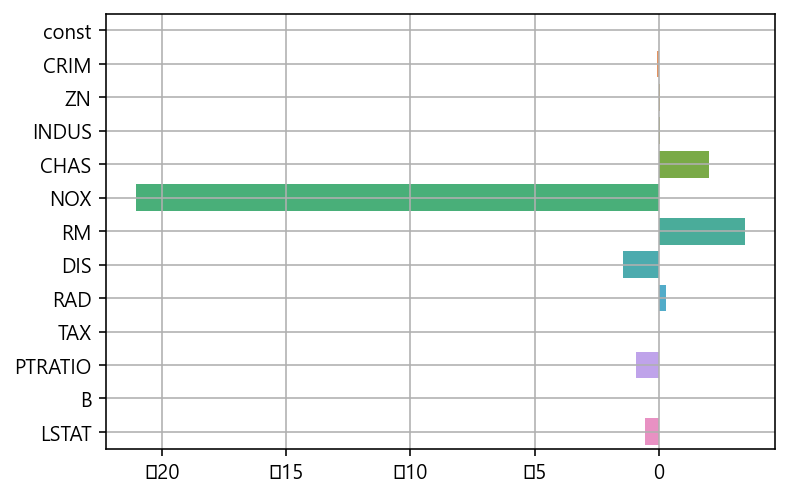

In [75]:
sns.barplot(lr.coef_[0], dfX_no_AGE.columns)
plt.grid()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
pred = lr2.predict(X_test)
mean_squared_error(y_test, pred)

28.667120417643968

In [79]:
for i in zip(dfX.columns, lr2.coef_[0]):
    print(i)

('const', 0.0)
('CRIM', -0.1160654172376791)
('ZN', 0.049175268323389296)
('INDUS', 0.04075944123245552)
('CHAS', 2.1614942550381597)
('NOX', -15.55420362595566)
('RM', 4.084333954240074)
('AGE', -0.002213075216432164)
('DIS', -1.3215457408555171)
('RAD', 0.27792115555102)
('TAX', -0.011247821162690574)
('PTRATIO', -0.999006974318251)
('B', 0.0077694890842111425)
('LSTAT', -0.5236295501773822)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


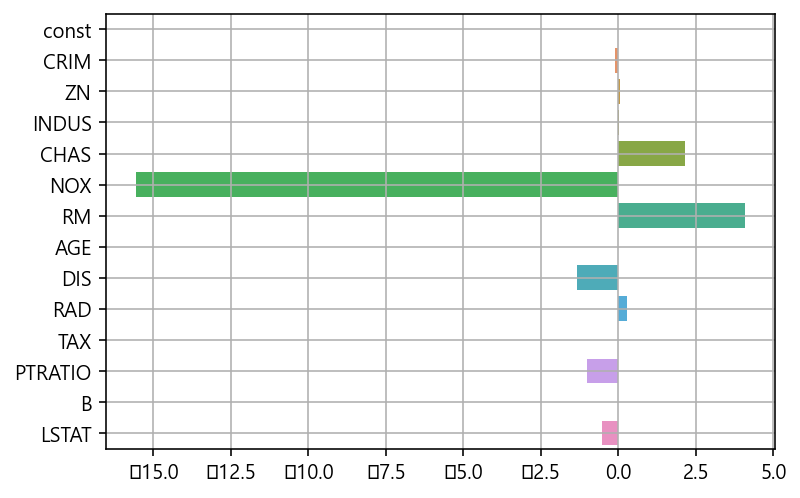

In [80]:
sns.barplot(lr2.coef_[0], dfX.columns)
plt.grid()

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


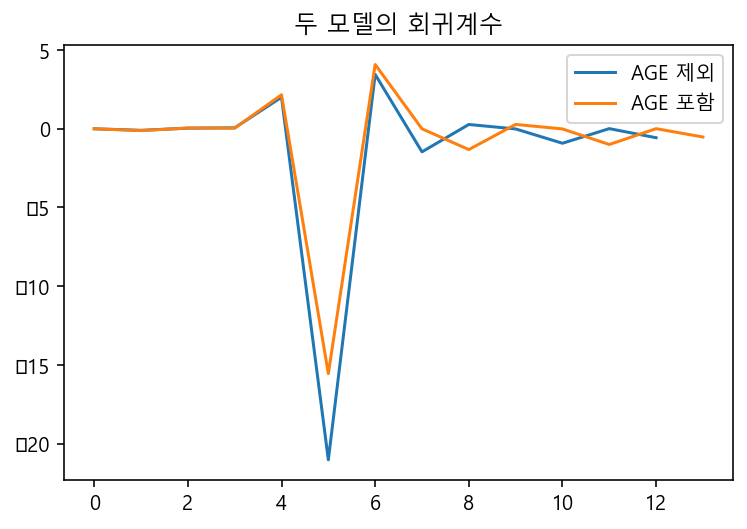

In [94]:
plt.plot(lr.coef_[0], label='AGE 제외')
plt.plot(lr2.coef_[0], label='AGE 포함')
plt.legend()
plt.title('두 모델의 회귀계수')
plt.show()

## 부분회귀 플롯

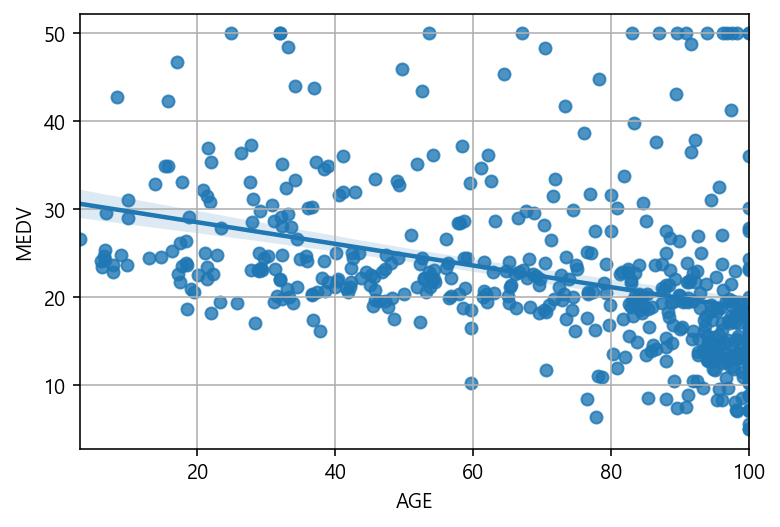

In [97]:
sns.regplot(data=df, x='AGE', y='MEDV')
plt.grid()
plt.show()

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


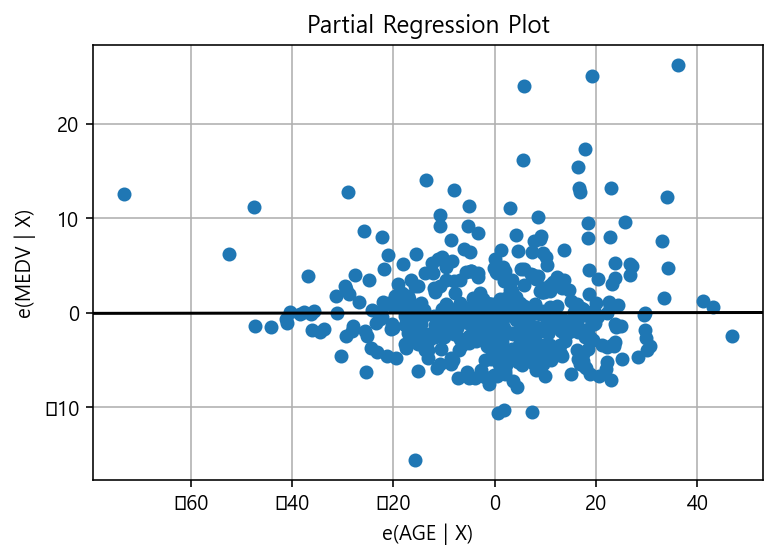

In [104]:
others = list(set(df.columns).difference(set(['MEDV','AGE'])))
p, resids = sm.graphics.plot_partregress(
    'MEDV', 'AGE', others, data=df, obs_labels=False, ret_coords=True)

plt.grid()
plt.show()

부분회귀 플롯의 가로축은 독립변수 자체의 값이 아닌 어떤 독립변수에서 다른 독립변수의 영향을 제거한 **순수한 독립변수 성분**을 뜻한다.

이를 통해 단순히 AGE와 MEDV의 상관관계가 마치 음의 관계가 있는것처럼 보였지만 실제로는 상관관계가 없는것을 확인할 수 있다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


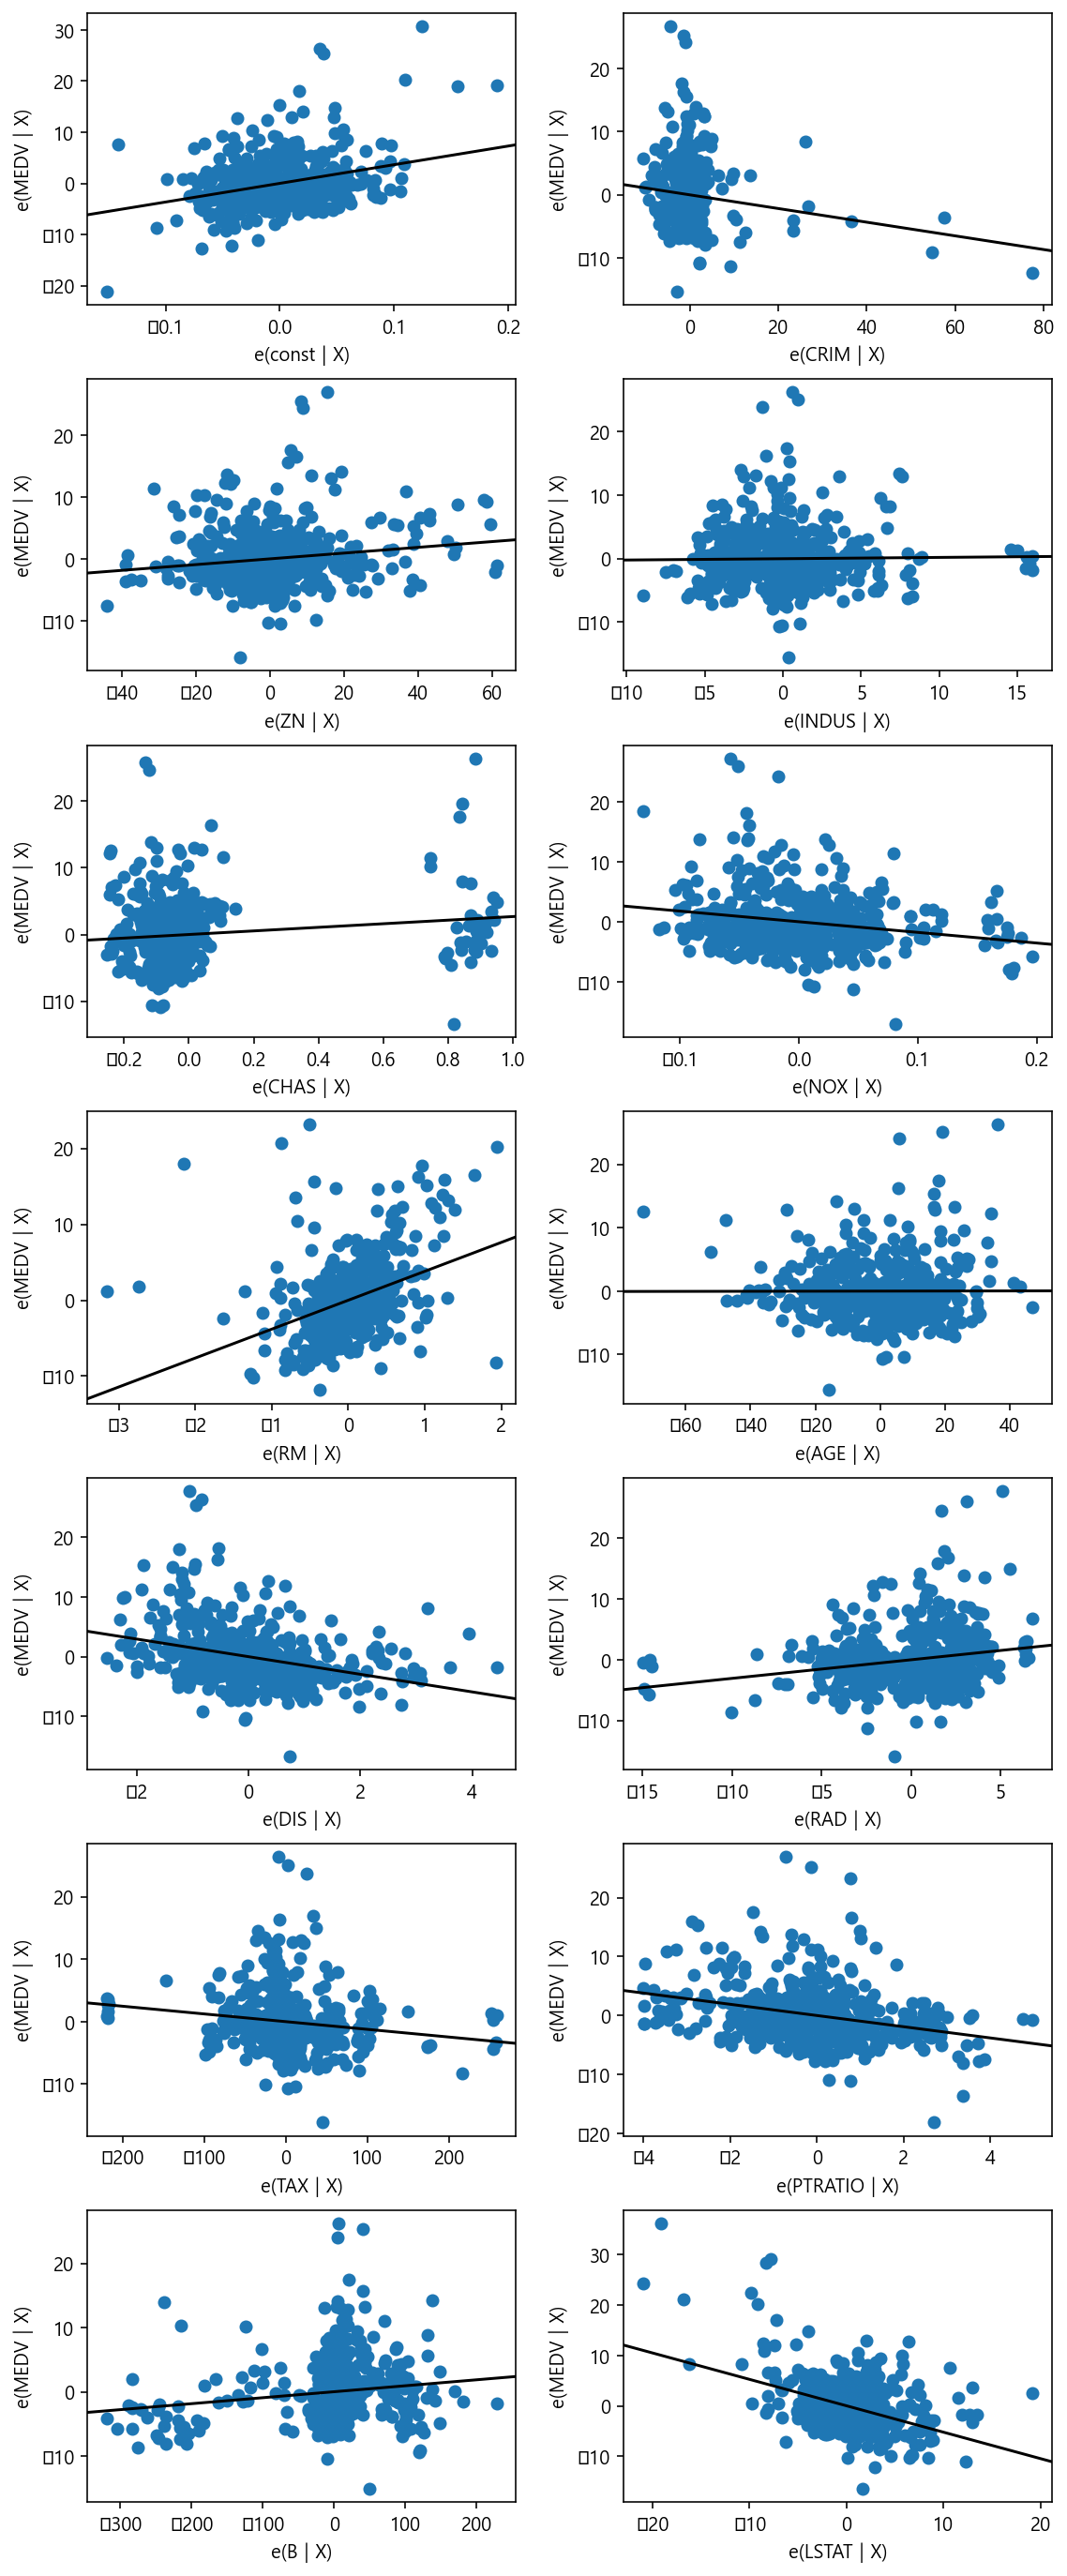

In [105]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## CCPR 플롯

CCPR(Component-Component plus Residual) 플롯 : 부분회귀 플롯과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것

- 가로축 : $x_i$
- 세로출 : $w_ix_i + e$

In [110]:
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 17 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        13:12:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


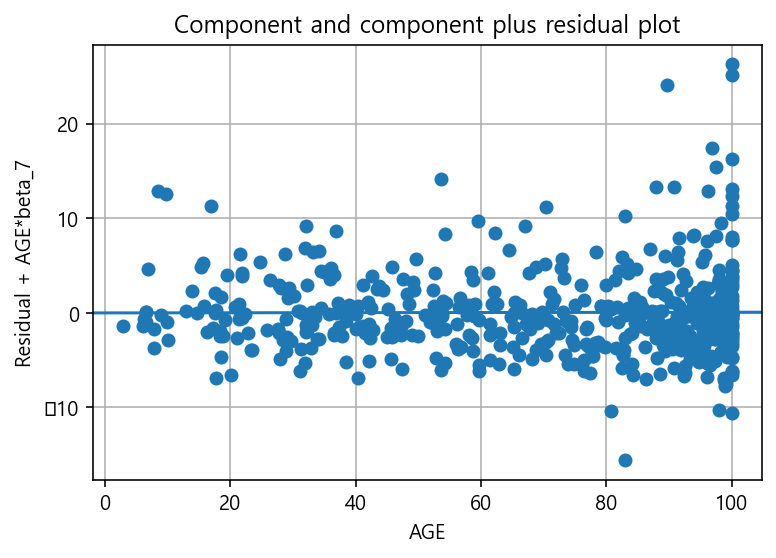

In [111]:
sm.graphics.plot_ccpr(result_boston, 'AGE')
plt.grid()
plt.show()

**CCPR 플롯의 $x$축은 실제 독립변수를 의미한다.**

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


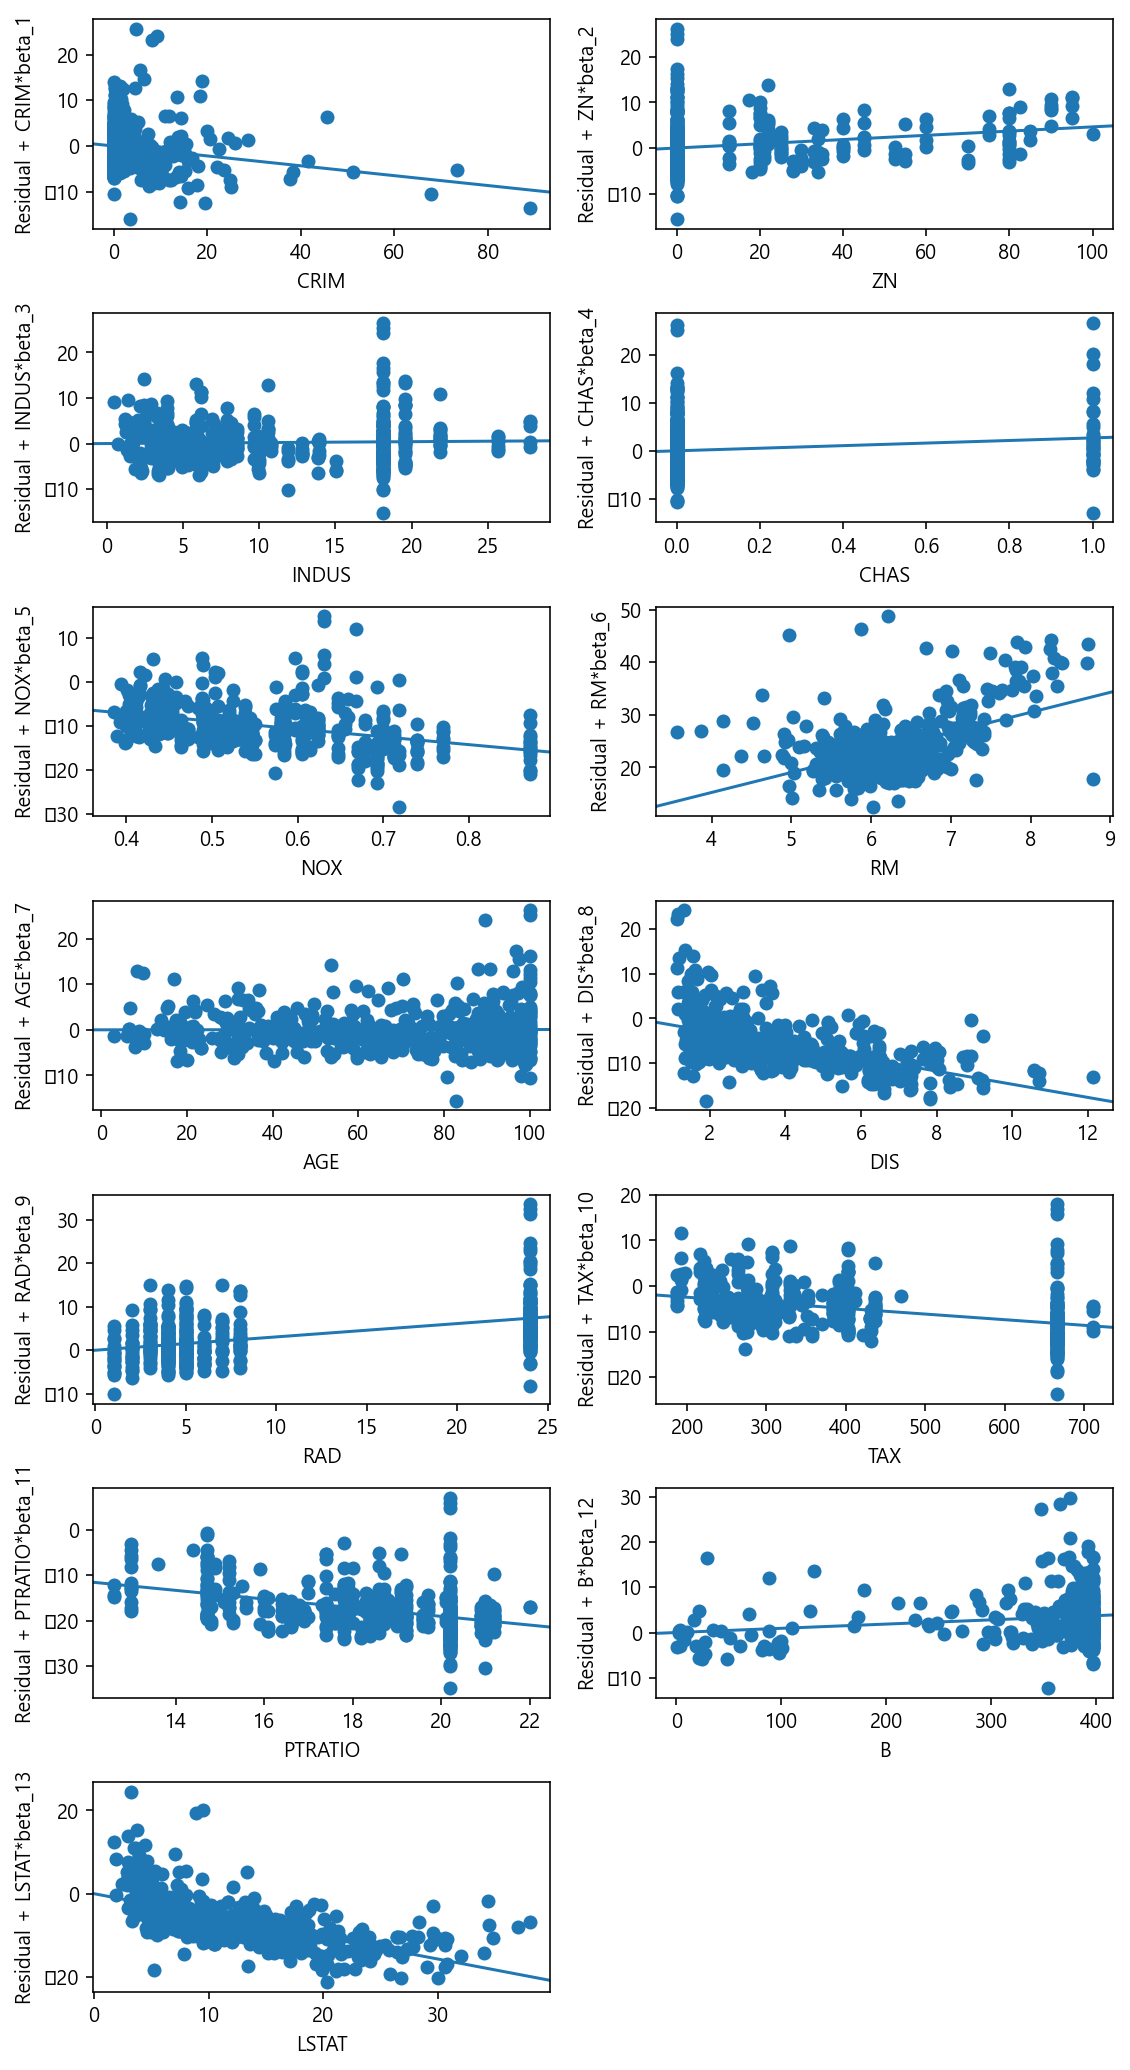

In [112]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## plot_regress_exog

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


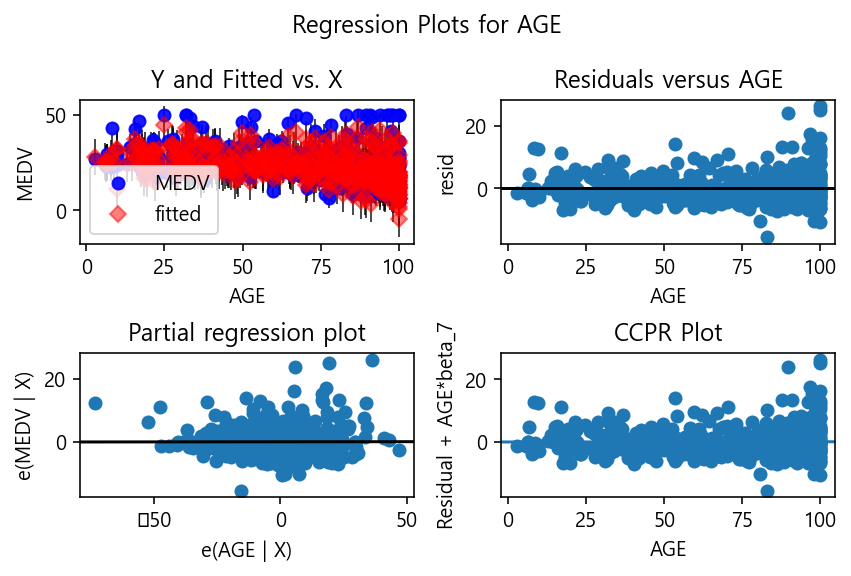

In [143]:
fig = sm.graphics.plot_regress_exog(result_boston, "AGE")
plt.tight_layout()
plt.show()

첫번째 플롯은 일반적인 플롯을 의미한다.

빨간색으로 표시된 fitted는 예측값을 의미한다.

두번째 플롯은 AGE와 잔차간의 상관관계를 의미한다. 이 경우 간혹 상관관계가 비선형으로 나타난다. 이는 이후 모델 검증, 수정에서 다룬다.